1) Data Preparation

Downloaded and read the .mat file into a variable

In [1]:
import scipy.io
data = scipy.io.loadmat('/Volumes/A/IIIT/SEM 7/ML/Assignment 3/train_32x32.mat')


In [2]:
print(len(data))
print(data.keys())
print(data)

5
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011', '__version__': '1.0', '__globals__': [], 'X': array([[[[ 33,  84,  19, ...,  92, 190, 216],
         [ 30,  76,  54, ...,  78, 188, 217],
         [ 38,  59, 110, ..., 101, 191, 212]],

        [[ 15,  86,  20, ...,  94, 205, 221],
         [ 23,  73,  52, ...,  82, 203, 222],
         [ 19,  66, 111, ..., 105, 206, 217]],

        [[ 15,  77,  25, ..., 114, 220, 226],
         [ 17,  78,  57, ..., 101, 218, 227],
         [ 19,  56, 116, ..., 125, 220, 221]],

        ...,

        [[ 72,  90,  65, ..., 200, 229, 200],
         [ 65,  78, 144, ..., 201, 231, 199],
         [ 56,  69, 223, ..., 203, 224, 191]],

        [[ 82,  88,  78, ..., 192, 229, 193],
         [ 77,  77, 148, ..., 193, 229, 188],
         [ 57,  67, 218, ..., 195, 224, 182]],

        [[ 89,  88,  98, ..., 190, 229, 197],
         [ 79,  78, 158, ..., 

In [3]:
x = data['X']
y = data['y']

Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

print(x.shape)
print(y.shape)

(32, 32, 3, 73257)
(73257, 1)


In [5]:
x = x.transpose(3, 0, 1, 2).reshape(73257, -1)
print(x.shape)

(73257, 3072)


In [6]:
# Split the data into training (70%) and a temporary dataset (30%)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

#Split temporary dataset into validation (20%) and testing (10%)
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42)


Visualize the distribution of class labels in the training, validation, and test sets.

In [7]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Training set
# sns.countplot(x=y_train.flatten())
# plt.title('Training Set')
# plt.show()

# # Validation set
# sns.countplot(x=y_validation.flatten())
# plt.title('Validation Set')
# plt.show()

# # Test set
# sns.countplot(x=y_test.flatten())
# plt.title('Test Set')
# plt.show()


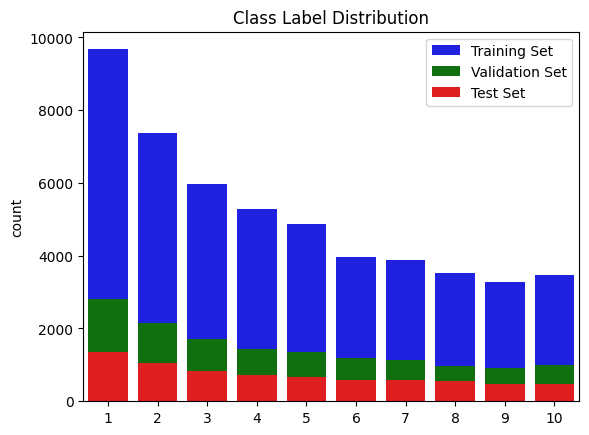

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.countplot(x=y_train.flatten(), label="Training Set", color='blue', ax=ax)
sns.countplot(x=y_validation.flatten(), label="Validation Set", color='green', ax=ax)
sns.countplot(x=y_test.flatten(), label="Test Set", color='red', ax=ax)
plt.title('Class Label Distribution')
plt.legend()
plt.show()


Visualize 5 unique samples from the training data

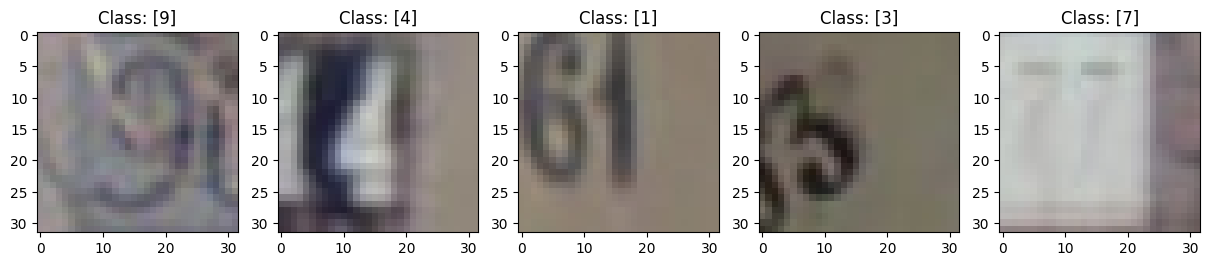

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

x__ = data['X']
# Generate 5 random integers between 0 and the length of the training data
random_indices =random.sample(range(x_train.shape[0]), 5)

# Visualize the 5 random samples
fig, ax = plt.subplots(1, 5, figsize=(15, 15))

for i in range(5):
    ax[i].set_title("Class: {}".format(y_train[random_indices[i]]))
    ax[i].imshow(x_train[random_indices[i]].reshape(32, 32, 3))

plt.show()

2. Model Training and Activation Functions:

A neural network with 2 hidden layers

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create an instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100)

# Train the model on the training data
mlp.fit(x_train, y_train)
# Test the model on the testing data
y_pred = mlp.predict(x_test)

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))


/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.1865956865956866


Grid Search to find the optimal hyperparameters

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
mlp = MLPClassifier(max_iter=70)

# Define the hyperparameters to search
param_grid = {
    'hidden_layer_sizes': [(64,32), (128,64), (256,128)],
    'batch_size': [16, 32, 64]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
# Print the best hyperparameters
print("Best hyperparameters:", best_params)


/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_n

Best hyperparameters: {'batch_size': 64, 'hidden_layer_sizes': (256, 128)}


Train the model using various activation functions: sigmoid, ReLU, tanh, and linear.

In [12]:
# m1 = MLPClassifier(hidden_layer_sizes=(256,128), activation='logistic', batch_size=64,max_iter=100)
# m1 = m1.fit(x_train, y_train)
# m2 = MLPClassifier(hidden_layer_sizes=(256,128), activation='relu', batch_size=64,max_iter=100)
# m2 = m2.fit(x_train, y_train)
# m3 = MLPClassifier(hidden_layer_sizes=(256,128), activation='tanh', batch_size=64,max_iter=100)
# m3 = m3.fit(x_train, y_train)
# m4 = MLPClassifier(hidden_layer_sizes=(256,128), activation='identity', batch_size=64,max_iter=100)
# m4 = m4.fit(x_train, y_train)

In [13]:
# Train the model and record loss at epoch for m1
validation_loss1 = []
training_loss1 = []
m1 = MLPClassifier(hidden_layer_sizes=(256,128), activation='logistic', batch_size=64,max_iter=15)

for epoch in range(m1.max_iter):
    m1.partial_fit(x_train, y_train, classes=np.unique(y_train))

    # Calculate training loss using training_scores_
    training_loss = m1.loss_
    training_loss1.append(training_loss)
    # Calculate validation loss using validation_scores_
    validation_loss = 1.0 - m1.score(x_validation, y_validation)
    validation_loss1.append(validation_loss)

/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_n

In [14]:
# Train the model and record loss at each epoch for m2
validation_loss2 = []
training_loss2 = []
m2 = MLPClassifier(hidden_layer_sizes=(256,128), activation='relu', batch_size=64,max_iter=15)
for epoch in range(m2.max_iter):
    m2.partial_fit(x_train, y_train, classes=np.unique(y_train))

    # Calculate training loss using training_scores_
    training_loss = m2.loss_
    training_loss2.append(training_loss)
    # Calculate validation loss using validation_scores_
    validation_loss = 1.0 - m2.score(x_validation, y_validation)
    validation_loss2.append(validation_loss)


/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_n

In [15]:
# Train the model and record loss at each epoch for m3
validation_loss3 = []
training_loss3 = []
m3 = MLPClassifier(hidden_layer_sizes=(256,128), activation='tanh', batch_size=64,max_iter=15)
for epoch in range(m3.max_iter):
    m3.partial_fit(x_train, y_train, classes=np.unique(y_train))

    # Calculate training loss using training_scores_
    training_loss = m3.loss_
    training_loss3.append(training_loss)
    # Calculate validation loss using validation_scores_
    validation_loss = 1.0 - m3.score(x_validation, y_validation)
    validation_loss3.append(validation_loss)

/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_n

In [16]:
# Train the model and record loss at each epoch for m4
validation_loss4 = []
training_loss4 = []
m4 = MLPClassifier(hidden_layer_sizes=(256,128), activation='identity', batch_size=64,max_iter=15)
for epoch in range(m4.max_iter):
    m4.partial_fit(x_train, y_train, classes=np.unique(y_train))

    # Calculate training loss using training_scores_
    training_loss = m4.loss_
    training_loss4.append(training_loss)
    # Calculate validation loss using validation_scores_
    validation_loss = 1.0 - m4.score(x_validation, y_validation)
    validation_loss4.append(validation_loss)

/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_n

Training loss vs epoch

In [17]:
training_losses = [training_loss1, training_loss2, training_loss3, training_loss4]
validation_losses = [validation_loss1, validation_loss2, validation_loss3, validation_loss4]    
print(training_losses)
print(validation_losses)

[[2.2442871946954575, 2.2389090660444837, 2.238258296788758, 2.2379654137959384, 2.237791516846774, 2.2379543997653766, 2.237849527811577, 2.237829305446232, 2.237805444654667, 2.2377555514883123, 2.2378061857122753, 2.2378902860788576, 2.237669918833681, 2.2377164237935343, 2.237679874957797], [15.604981317343217, 4.032074703839945, 2.0723870978822463, 1.8247253659198792, 1.6310495489625003, 1.5985743512408968, 1.5522738080297085, 1.5432216699922454, 1.5443165539185417, 1.4922094412855285, 1.8524819029739887, 1.7765252961116687, 1.7554368360866364, 1.7356072254931156, 1.7423083606209346], [2.254851399776519, 2.2494222774727874, 2.2493305657402813, 2.248288257310163, 2.2483044873703584, 2.2496082249030684, 2.2503982793134005, 2.2488149653850593, 2.2480252150320994, 2.2487566184210106, 2.2472948236027386, 2.2482954852614667, 2.24777773576744, 2.2486942008927175, 2.247622682130301], [19.421354662489545, 2.9694326351044658, 2.789531080368155, 8.43209377602671, 8.04293471527402, 2.29167316

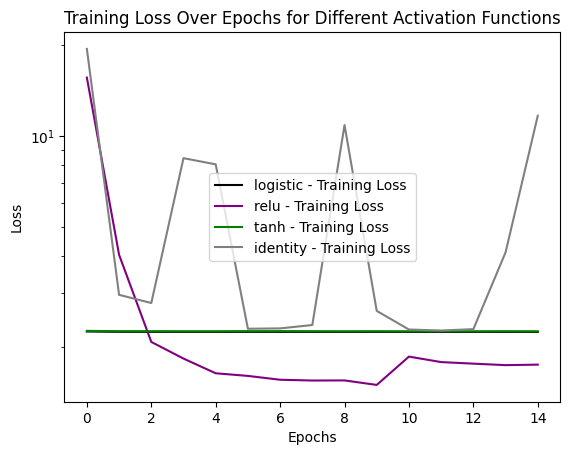

In [18]:
# Define the activation functions and colors
activation_functions = ['logistic', 'relu', 'tanh', 'identity']
colors = ['black', 'purple', 'green', 'grey']

# Plot the training losses for each activation function
for i, loss in enumerate(training_losses):
    activation_function = activation_functions[i]
    color = colors[i]
    plt.plot(loss, label=f'{activation_function} - Training Loss', color=color)

# Set plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs for Different Activation Functions')
plt.legend()
plt.yscale('log')
plt.show()


Validation Loss vs Epoch

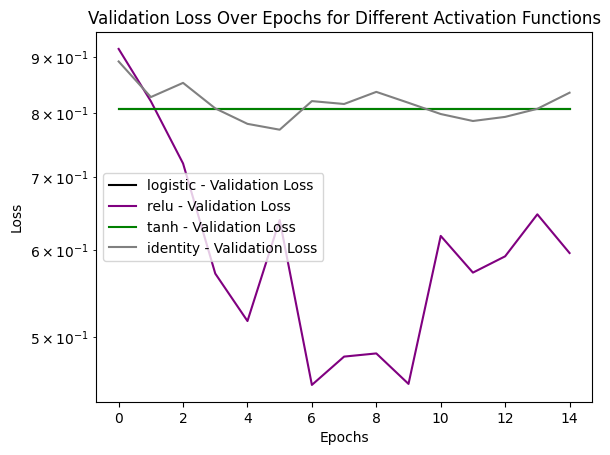

In [19]:
activation_functions = ['logistic', 'relu', 'tanh', 'identity']
col = ['black', 'purple', 'green', 'grey']
validation_losses = [validation_loss1, validation_loss2, validation_loss3, validation_loss4]

for i, l in enumerate(validation_losses):
    activation_function = activation_functions[i]
    # Extract training history from the model
    history = validation_losses[i]
    # Plot training loss
    plt.plot(history, label=f'{activation_function} - Validation Loss', color=col[i])

# Set plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs for Different Activation Functions')
plt.legend()
plt.yscale('log')
plt.show()


In [20]:
# activation_functions = ['logistic', 'relu', 'tanh', 'identity']
# col = ['black', 'purple', 'green', 'grey']
# import matplotlib.pyplot as plt

# # # Define the validation scores
# # validation_scores = [validation_score1, validation_score2, validation_score3, validation_score4]

# #Define the validation losses
# validation_losses = [validation_loss1, validation_loss2, validation_loss3, validation_loss4]


# # Plot the validation losses
# plt.bar(activation_functions, validation_scores, color=col)

# # Set plot labels and title
# plt.xlabel('Activation Function')
# plt.ylabel('Validation Score')
# plt.title('Validation Scores for Different Activation Functions')
# plt.show()


In [21]:
# activation_functions = ['logistic', 'relu', 'tanh', 'identity']
# col = ['black', 'purple', 'green', 'grey']
# validation_losses = [validation_loss1, validation_loss2, validation_loss3, validation_loss4]

# for i, l in enumerate(validation_losses):
#     activation_function = activation_functions[i]
#     # Extract training history from the model
#     history = validation_losses[i]
#     # Plot training loss
#     plt.plot(history, label=f'{activation_function} - Validation Loss', color=col[i])

# # Set plot labels and title
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Validation Loss Over Epochs for Different Activation Functions')
# plt.legend()
# plt.yscale('log')
# plt.show()

Training model with RELU activation function and other best hyper parameters

In [31]:
model_final = MLPClassifier(hidden_layer_sizes=(256, 128), activation='relu', batch_size=64, max_iter=300)
model_final.fit(x_train, y_train)
y_pred = model_final.predict(x_test)

/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best accuracy achieved on the test set

In [32]:
# Evaluate the accuracy of the model on the test set
test_accuracy = model_final.score(x_test, y_test)
val_accuracy = model_final.score(x_validation, y_validation)
# Print the best accuracy achieved on the test set
print("Best accuracy on validation set:", val_accuracy)
print("Best accuracy on test set:", test_accuracy)

Best accuracy on validation set: 0.5655200655200655
Best accuracy on test set: 0.5540540540540541


3. Visualization of Incorrect Predictions

For each class in the test set, visualize 3 misclassified images along with their predicted class labels.

In [33]:
import numpy as np

# Find the unique class labels in the test set
num_classes = len(np.unique(y_test))

# Print the number of classes in the test set
print("Number of classes in the test set:", num_classes)


Number of classes in the test set: 10


In [34]:
import random

# Find the misclassified images
misclassified_indices = np.where(y_pred != y_test.flatten())[0]

# Create a nested list with 3 indices from each class in the test set
misclassified_indices_for_classes = []
for i in range(1, 11):
    # Get the indices of misclassified images for this class
    misclassified_indices_for_class = np.intersect1d(np.where(y_test == i)[0], misclassified_indices)
    
    # If there are no misclassified images for this class, skip to the next class
    if len(misclassified_indices_for_class) == 0:
        continue
    
    # Randomly select 3 indices from the misclassified_indices_for_class array
    random_indices = random.sample(list(misclassified_indices_for_class), 3)
    
    # Add the 3 random indices to the nested list
    misclassified_indices_for_classes.append(random_indices)
    
print(len(misclassified_indices_for_classes))
print("Nested list with 3 indices from each class:", misclassified_indices_for_classes)


10
Nested list with 3 indices from each class: [[4902, 5879, 5722], [3934, 3497, 1745], [3354, 4023, 2913], [7214, 261, 1820], [1074, 6831, 1161], [6098, 5252, 1865], [2066, 6204, 4025], [875, 5110, 2388], [4133, 1734, 4518], [4068, 4759, 1583]]


In [26]:
# x__ = data['X']

# # Visualize the samples
# fig, axs = plt.subplots(9, 3, figsize=(15, 30))

# for i in range(9):  # Loop through each row
#     for j in range(3):  # Loop through each plot in the row
#         index = misclassified_indices_for_classes[i][j]
#         img = x__[:, :, :, index]
#         axs[i, j].set_title(f"Image Prediction: {y_pred[index]} - Actual Class: {y_test[index]}")
#         axs[i, j].imshow(img)

# # Adjust layout
# plt.tight_layout()
# plt.show()


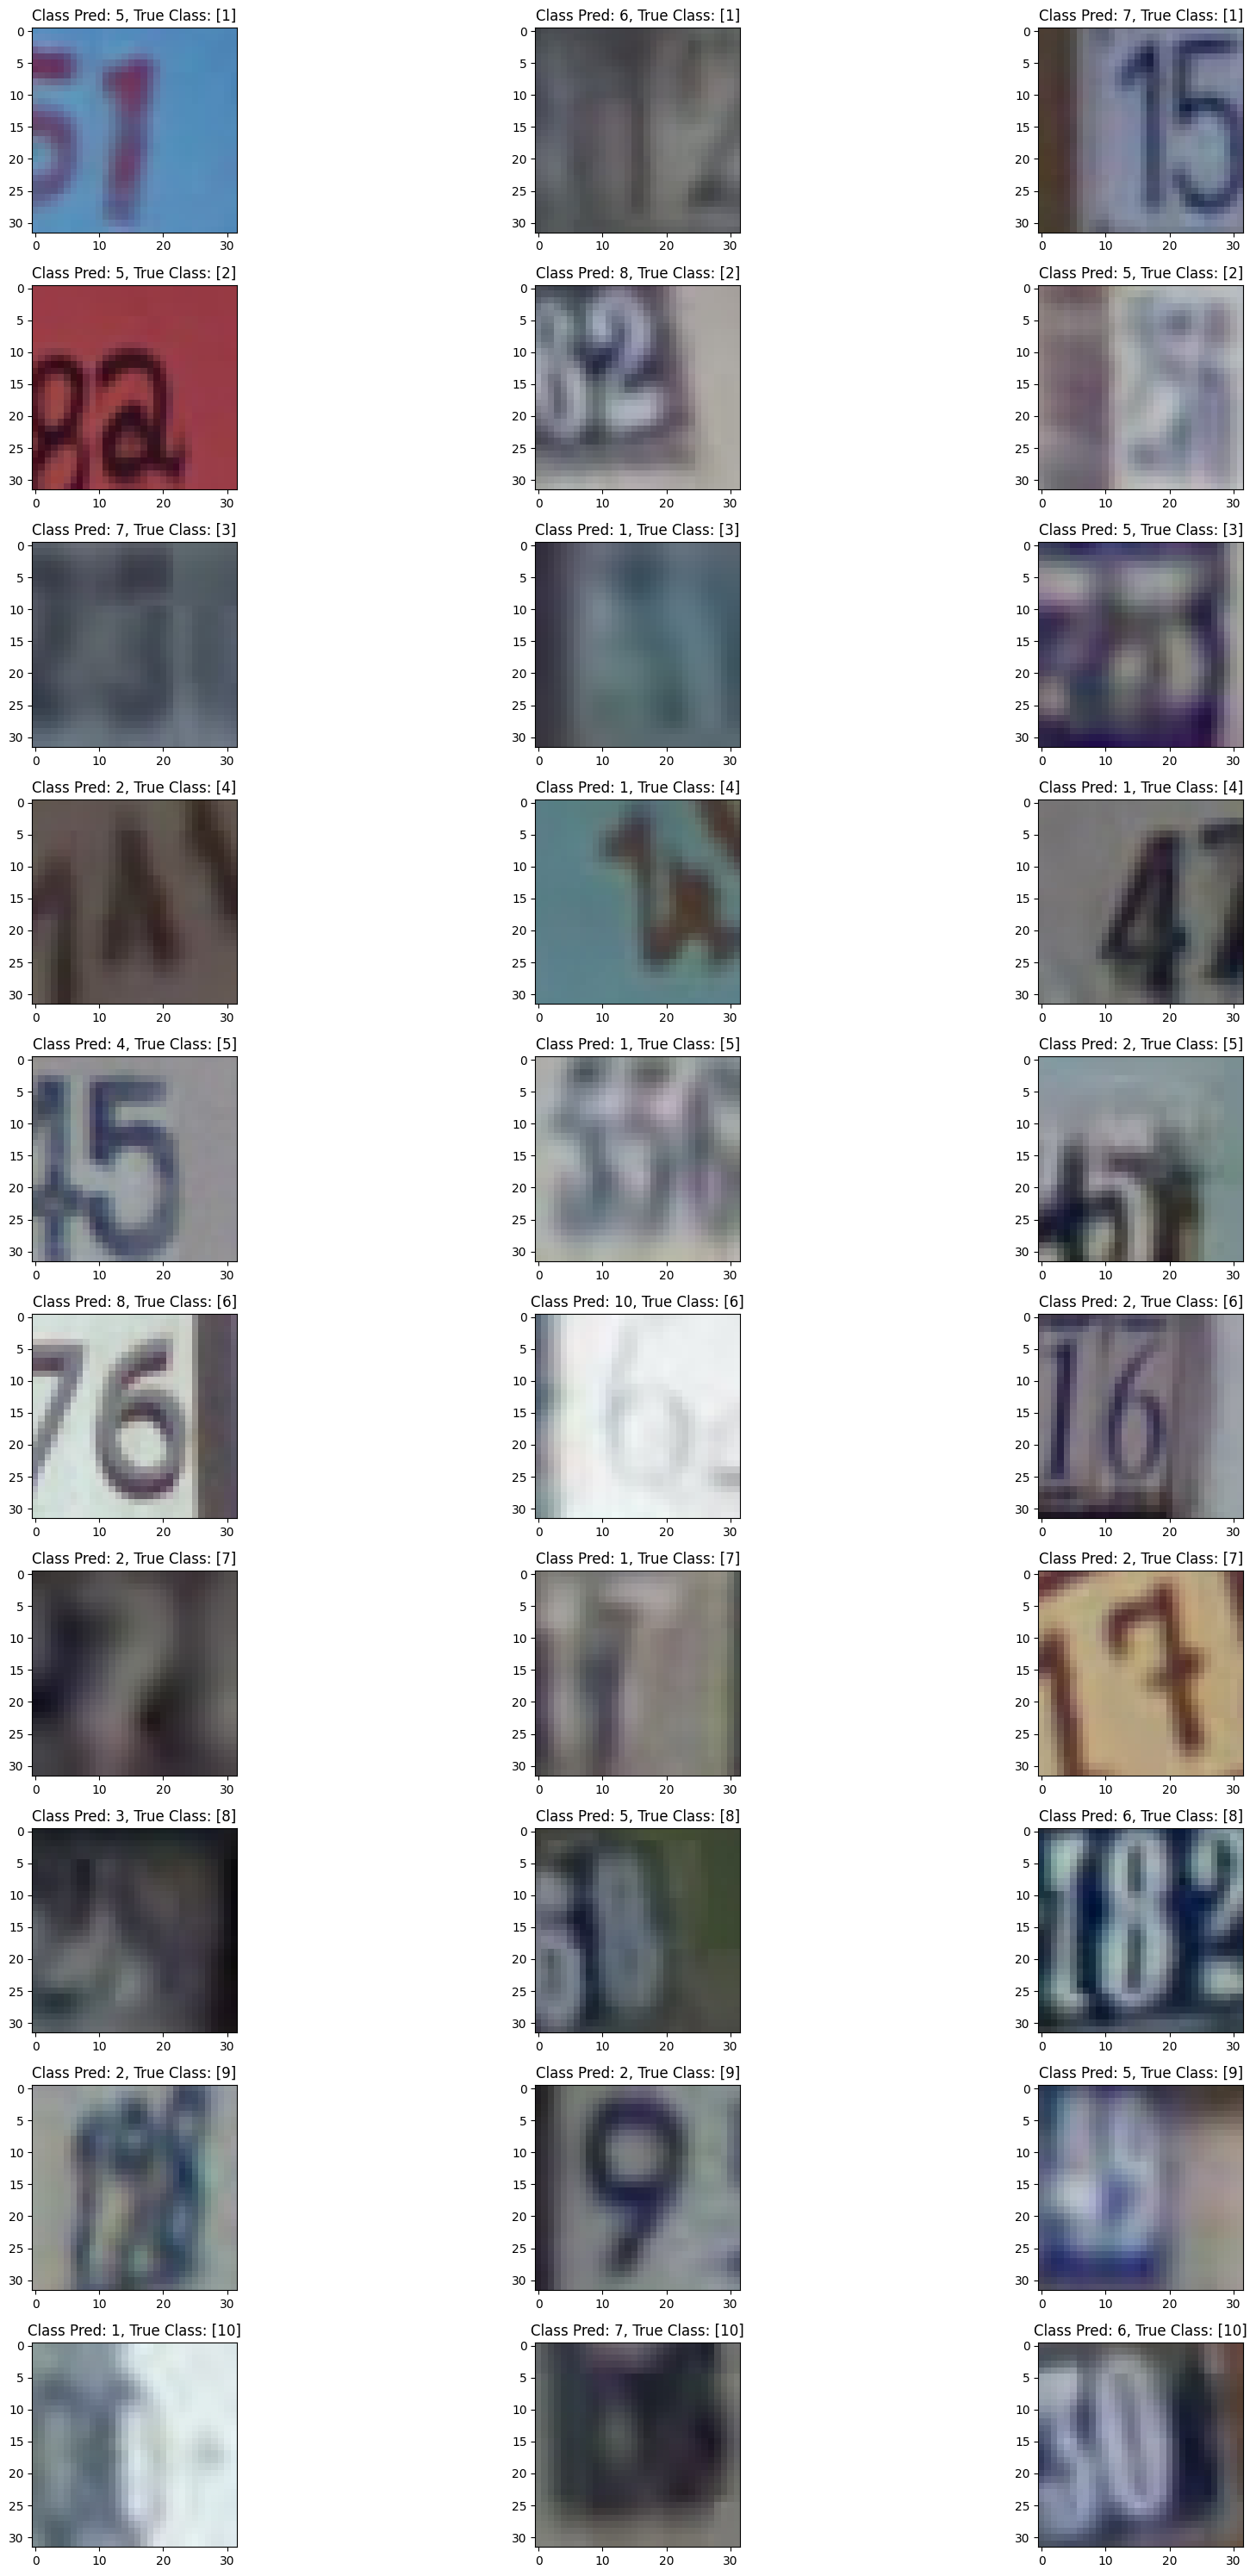

In [35]:
# Find misclassified indices
misclassified_indices = np.where(y_pred != y_test.flatten())[0]
# Create a figure with 10 rows and 3 columns
fig, axs = plt.subplots(10, 3, figsize=(20, 30))
# Visualize 3 misclassified images for each class
for class_label in np.unique(y_test):
    # Get indices of misclassified images for the current class
    misclassified_indices_for_class = np.intersect1d(np.where(y_test == class_label)[0], misclassified_indices)
    # Visualize 3 misclassified images for the current class
    for i in range(min(3, len(misclassified_indices_for_class))):
        index = misclassified_indices_for_class[i]
        misclassified_image = x_test[index].reshape(32, 32, 3)
        axs[class_label-1, i].imshow(misclassified_image)
        axs[class_label-1, i].set_title(f'Class Pred: {y_pred[index]}, True Class: {y_test[index]}')

# Adjust layout
plt.tight_layout()
# Show the figure
plt.show()


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.79      0.63      1367
           2       0.68      0.60      0.64      1052
           3       0.66      0.41      0.51       833
           4       0.76      0.58      0.66       735
           5       0.41      0.55      0.47       672
           6       0.52      0.54      0.53       590
           7       0.58      0.50      0.53       577
           8       0.59      0.36      0.45       548
           9       0.42      0.32      0.36       469
          10       0.45      0.53      0.49       483

    accuracy                           0.55      7326
   macro avg       0.56      0.52      0.53      7326
weighted avg       0.57      0.55      0.55      7326

